In [41]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import seaborn as sns; sns.set()
import SeabornFig2Grid as sfg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import matplotlib.image as img



# AUS_DESCRIPTION = 
	{ "AU01", "Inner Brow Raiser   " },
	{ "AU02", "Outer Brow Raiser   " },
	{ "AU04", "Brow Lowerer        " },
	{ "AU05", "Upper Lid Raiser    " },
	{ "AU06", "Cheek Raiser        " },
	{ "AU07", "Lid Tightener       " },
	{ "AU09", "Nose Wrinkler       " },
	{ "AU10", "Upper Lip Raiser    " },
	{ "AU12", "Lip Corner Puller   " },
	{ "AU14", "Dimpler             " },
	{ "AU15", "Lip Corner Depressor" },
	{ "AU17", "Chin Raiser         " },
	{ "AU20", "Lip stretcher       " },
	{ "AU23", "Lip Tightener       " },
	{ "AU25", "Lips part           " },
	{ "AU26", "Jaw Drop            " },
	{ "AU28", "Lip Suck            " },
	{ "AU45", "Blink               " },

In [11]:
AUen = np.load('/home/ytikewk/python_project/daisee_detect/auen.npy')
AUdis = np.load('/home/ytikewk/python_project/daisee_detect/audis.npy')

In [13]:
len(AUdis)

878

In [14]:
# get mean of en
en_au_mean = []

for n, i in enumerate(AUen):
    # full_data 

    ########################################################
    file = i
    file_name = file[:-4]+str('.csv')
    ########################################################


    os.chdir("/media/ytikewk/76627FE2627FA591/dataset/DAiSEE/DAiSEE/csv_file/train")

    if os.path.exists(file_name):
        full_data = pd.read_csv(file_name)
    else:
        os.chdir('../test')

    if os.path.exists(file_name):
        full_data = pd.read_csv(file_name)
    else:
        os.chdir('../val')

    if os.path.exists(file_name):
        full_data = pd.read_csv(file_name)
    else:
        print("file nost exist")


    # os.getcwd()

    # timestamp = full_data.iloc[:,2:3]
    # gaze = full_data.iloc[:,5+6:5+8]
    # pose = full_data.iloc[:,293:299]
    aus = full_data.iloc[:,-35:-18]


    # sns.set_style('white')
    au = aus.iloc[:,-1]
    au_mean = au[au != 0].mean()
    en_au_mean.append(au_mean)

In [15]:
en_au_mean

[0.41953020134228186,
 0.3176470588235294,
 0.38773049645390073,
 0.22660919540229885,
 0.11900584795321638,
 0.245448275862069,
 0.2573717948717949,
 0.4699354838709677,
 0.49516556291390734,
 0.5838095238095238,
 0.4179999999999999,
 0.8420805369127518,
 0.4700714285714286,
 0.2706622516556292,
 0.8309722222222222,
 0.5904,
 0.20350649350649347,
 0.4506493506493506,
 0.371969696969697,
 0.6546710526315789,
 0.2592638036809816,
 0.4063694267515923,
 0.5116296296296297,
 0.11590643274853804,
 0.7232867132867133,
 0.22538011695906432,
 0.9240559440559442,
 0.1542758620689655,
 0.15822368421052632,
 0.5073333333333332,
 0.26719745222929936,
 0.1685185185185185,
 0.6047058823529412,
 0.4395333333333333,
 0.7418881118881119,
 0.46716216216216216,
 0.3518493150684931,
 0.414041095890411,
 0.5075816993464052,
 0.3546308724832215,
 0.5475838926174497,
 0.3809154929577465,
 0.3673780487804879,
 0.40827338129496404,
 0.4381954887218045,
 0.23257861635220128,
 0.296358024691358,
 0.3844852941176

In [16]:
# get mean of dis
from tqdm import tqdm
disen_au_mean = []

for n, i in tqdm(enumerate(AUdis)):
    # full_data 

    ########################################################
    file = i
    file_name = file[:-4]+str('.csv')
    ########################################################


    os.chdir("/media/ytikewk/76627FE2627FA591/dataset/DAiSEE/DAiSEE/csv_file/train")

    if os.path.exists(file_name):
        full_data = pd.read_csv(file_name)
    else:
        os.chdir('../test')

    if os.path.exists(file_name):
        full_data = pd.read_csv(file_name)
    else:
        os.chdir('../val')

    if os.path.exists(file_name):
        full_data = pd.read_csv(file_name)
    else:
        print("file nost exist")


    # os.getcwd()

    # timestamp = full_data.iloc[:,2:3]
    # gaze = full_data.iloc[:,5+6:5+8]
    # pose = full_data.iloc[:,293:299]
    aus = full_data.iloc[:,-35:-18]


    # sns.set_style('white')
    au = aus.iloc[:,-1]
    au_mean = au[au != 0].mean()
    disen_au_mean.append(au_mean)

878it [02:10,  6.75it/s]


In [30]:
y1 = pd.Series(np.array(en_au_mean)) 
y2 = pd.Series(np.array(disen_au_mean)) 
data = pd.DataFrame({"diengaged": y1, "engaged": y2 }) 

In [35]:
data.describe()

,diengaged,engaged
count,112.000000,878.000000
mean,0.425870,0.297210
std,0.212336,0.148944
min,0.079057,0.079141
25%,0.255529,0.190964
50%,0.401837,0.267436
75%,0.514670,0.370798
max,1.034154,1.433759


In [22]:
aa = [en_au_mean,disen_au_mean]

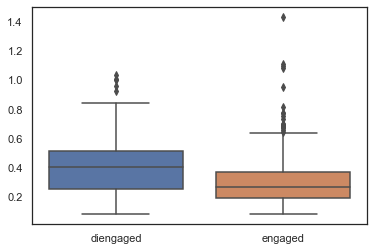

In [33]:
import seaborn as sns
sns.boxplot(data = data)
# sns.boxplot(en_au_mean)
plt.savefig('/home/ytikewk/python_project/daisee_detect/figures/au/au_mean.png')

In [ ]:
'3100721002.avi', '3100721022.avi', '2100591050.avi', '33702101130.mp4', '2100521029.avi', '2100592038.avi',
'29042802750.mp4', '3503610121.avi', '2100521050.avi', '3100721068.avi', '2100552012.avi', '1813740269.avi', 
'248510225.mp4', '3100772027.avi', '2100512032.avi', '2100582012.avi', '240846012.avi', '2100551071.avi',
'4000221006.avi', '1100411055.avi', '2100551028.avi', '4100281060.avi', '2100602029.avi', '3344630225.avi',
'2100561014.avi', '29042802570.mp4', '3100742014.avi', '1100042031.avi', '3100742034.avi', '3100822050.avi',
'4140810133.avi', '205601027.avi', '4100202022.avi', '4140810135.avi', '1100071069.avi', '3100722023.avi', 
'2100521054.avi', '5674960151.avi', '5000391026.avi', '2100521027.avi', '3100831020.avi', '5674960126.avi',
'1100141031.avi', '1100072050.avi', '29042802150.mp4', '2100602032.avi', '1100152015.avi', '4100282012.avi',
'1100011072.avi', '4599990148.avi', '2000502019.avi', '3100722014.avi', '3100831006.avi', '1100071006.avi', 
'2100602002.avi', '1100071045.avi', '3503610143.avi', '1813740174.avi', '3100801006.avi', '2100551016.avi', 
'2000541019.avi', '4000332002.avi', '3100811051.avi', '4100322052.avi', '2100532050.avi', '2100512012.avi',
'3344630241.avi', '3344630231.avi', '33702102420.mp4', '3100661046.avi', '2100551037.avi', '1100161016.avi', 
'4140810126.avi', '1100122013.avi', '2100612028.avi', '1100012052.avi', '2100522064.avi', '1813740181.avi', 
'29042801260.mp4', '2100531010.avi', '3100722012.avi', '2100591054.avi', '4100241046.avi', '3422270135.avi',
'3100722021.avi', '5000391050.avi', '2100591055.avi', '2100532013.avi', '1100072076.avi', '1100161012.avi', 
'3100791056.avi', '3100632041.avi', '2408460127.avi', '33446301100.avi', '3100771014.avi', '3100632025.avi', 
'3100821019.avi', '2100551068.avi', '1100161004.avi', '4018350147.mp4'


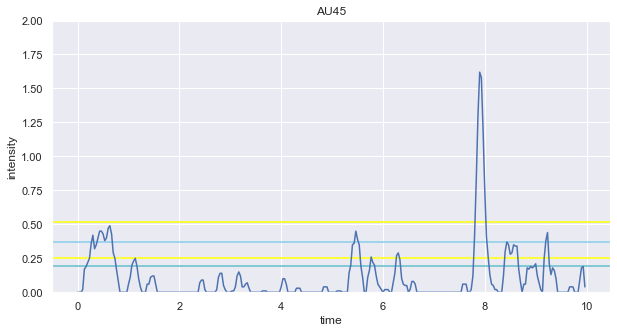

In [56]:
# full_data 

########################################################
file =  '2000541019.avi'
fl = 'en_4'
file_name = file[:-4]+str('.csv')
########################################################


os.chdir("/media/ytikewk/76627FE2627FA591/dataset/DAiSEE/DAiSEE/csv_file/train")

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    os.chdir('../test')

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    os.chdir('../val')

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    print("file nost exist")
    
    
# os.getcwd()

# timestamp = full_data.iloc[:,2:3]
# gaze = full_data.iloc[:,5+6:5+8]
# pose = full_data.iloc[:,293:299]
aus = full_data.iloc[:,-35:-18]


# sns.set_style('white')
au = aus.iloc[:,-1]
au_mean = au[au != 0].mean()

plt.figure(figsize=(10,5))
# plt.subplot(211)
plt.ylim((0,2))
plt.axhline(au_mean,color="g")
plt.axhline(0.256,color="yellow")
plt.axhline(0.515,color='yellow')
plt.axhline(0.191,color="skyblue")
plt.axhline(0.371,color="skyblue")
plt.xlabel("time")
plt.ylabel('intensity')
plt.title('AU45')
plt.plot(timestamp,au)
plt.savefig('/home/ytikewk/python_project/daisee_detect/figures/au/'+fl+'.png')

In [ ]:
'4100241059.avi', '3100751006.avi', '3100751010.avi', '4100261050.avi', '3100681017.avi', '5000391056.avi',
'3100822011.avi', '3100742058.avi', '5564630211.avi', '4100321019.avi', '4110211014.avi', '4100281067.avi', 
'4110211004.avi', '4100192015.avi', '3100822065.avi', '3344630211.avi', '4100251061.avi', '4100251057.avi', 
'1100172017.avi', '303830113.mp4', '4100271038.avi', '4100291027.avi', '556463014.avi', '3100681015.avi', 
'3100752014.avi', '5674960155.avi', '4100192049.avi', '4100302013.avi', '3100752037.avi', '4110211053.avi', 
'4110312009.avi', '3100642036.avi', '5564630226.avi', '1100412039.avi', '4110211001.avi', '1100412033.avi', 
'556463025.avi', '4100192029.avi', '4110211038.avi', '4100262056.avi', '4110311048.avi', '4100251016.avi', 
'4110211023.avi', '3100751057.avi', '4100321043.avi', '4110211021.avi', '4110211055.avi', '2100582055.avi',
'4100281046.avi', '4000182035.avi', '2100531054.avi', '4000222031.avi', '4100261041.avi', '4100322032.avi',
'4110211005.avi', '3344630131.avi', '4100302044.avi', '2100582052.avi', '4100192031.avi', '3503610158.avi', 
'4100201039.avi', '3100762027.avi', '2100551042.avi', '4100251046.avi', '4110211013.avi', '1813740185.avi',
'4100281053.avi', '2000502065.avi', '4110211039.avi', '4110212034.avi', '4100321042.avi', '4100321001.avi',
'1100171004.avi', '4100302018.avi', '4100201043.avi', '4100252041.avi', '1813740184.avi', '3100751012.avi',
'1100171008.avi', '1110031027.avi', '4110211040.avi', '1100042023.avi', '4110211015.avi', '4100262004.avi', 
'4000222032.avi', '4110211075.avi', '5564630132.avi', '1110031010.avi', '4100252044.avi', '1110031033.avi', 
'303830149.mp4', '1100172033.avi', '1100052014.avi', '4100251049.avi', '3100681018.avi', '1100172034.avi', 
'3100681042.avi', '4100251068.avi', '2100582056.avi', '4100261034.avi'

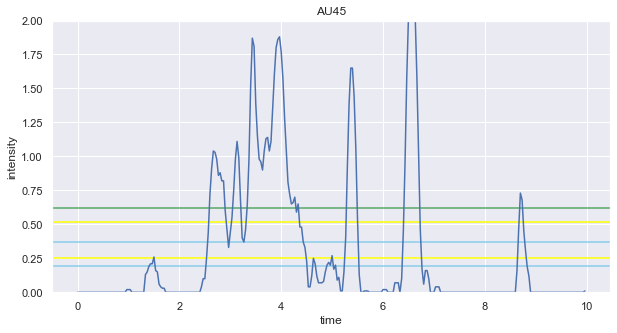

In [64]:
# full_data 

########################################################
file ='4000182035.avi'
fl = 'disen_4'
file_name = file[:-4]+str('.csv')
########################################################


os.chdir("/media/ytikewk/76627FE2627FA591/dataset/DAiSEE/DAiSEE/csv_file/train")

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    os.chdir('../test')

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    os.chdir('../val')

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    print("file nost exist")
    
    
# os.getcwd()

# timestamp = full_data.iloc[:,2:3]
# gaze = full_data.iloc[:,5+6:5+8]
# pose = full_data.iloc[:,293:299]
aus = full_data.iloc[:,-35:-18]


# sns.set_style('white')
au = aus.iloc[:,-1]
au_mean = au[au != 0].mean()

plt.figure(figsize=(10,5))
# plt.subplot(211)
plt.ylim((0,2))
plt.axhline(au_mean,color="g")
plt.axhline(0.256,color="yellow")
plt.axhline(0.515,color='yellow')
plt.axhline(0.191,color="skyblue")
plt.axhline(0.371,color="skyblue")
plt.xlabel("time")
plt.ylabel('intensity')
plt.title('AU45')
plt.plot(timestamp,au)
plt.savefig('/home/ytikewk/python_project/daisee_detect/figures/au/'+fl+'.png')

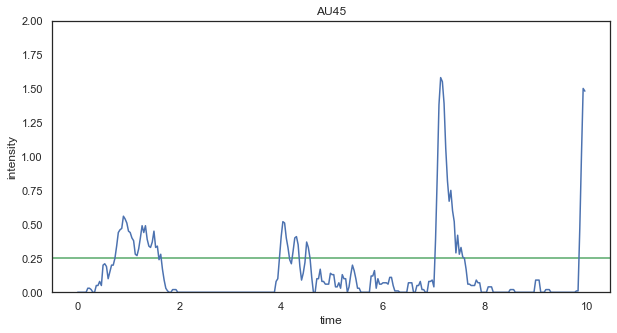

In [10]:
# full_data 

########################################################
file = '1813740214.avi'
file_name = file[:-4]+str('.csv')
########################################################


os.chdir("/media/ytikewk/76627FE2627FA591/dataset/DAiSEE/DAiSEE/csv_file/train")

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    os.chdir('../test')

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    os.chdir('../val')

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    print("file nost exist")
    
    
os.getcwd()

timestamp = full_data.iloc[:,2:3]
gaze = full_data.iloc[:,5+6:5+8]
pose = full_data.iloc[:,293:299]
aus = full_data.iloc[:,-35:-18]


sns.set_style('white')
au = aus.iloc[:,-1]
au_mean = au[au != 0].mean()


plt.figure(figsize=(10,5))
# plt.subplot(211)
plt.axhline(au_mean,color="g")
plt.xlabel("time")
plt.ylabel('intensity')
plt.title('AU45')
plt.ylim((0,2))
plt.plot(timestamp,au)


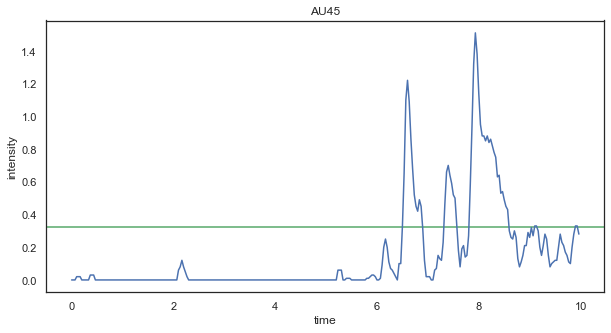

In [6]:
# full_data 

########################################################
file = '5100382030.avi'
file_name = file[:-4]+str('.csv')
########################################################


os.chdir("/media/ytikewk/76627FE2627FA591/dataset/DAiSEE/DAiSEE/csv_file/train")

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    os.chdir('../test')

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    os.chdir('../val')

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    print("file nost exist")
    
    
os.getcwd()

timestamp = full_data.iloc[:,2:3]
gaze = full_data.iloc[:,5+6:5+8]
pose = full_data.iloc[:,293:299]
aus = full_data.iloc[:,-35:-18]


sns.set_style('white')
au = aus.iloc[:,-1]
au_mean = au[au != 0].mean()

plt.figure(figsize=(10,5))
# plt.subplot'3100662046.avi'(211)
plt.axhline(au_mean,color="g")
plt.xlabel("time")
plt.ylabel('intensity')
plt.title('AU45')
plt.plot(timestamp,au)


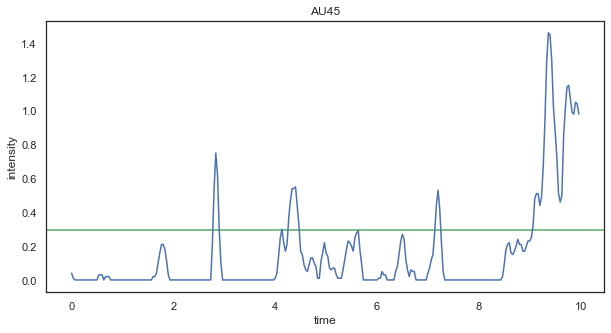

In [8]:
# full_data 

########################################################
file = '3100662046.avi'
file_name = file[:-4]+str('.csv')
########################################################


os.chdir("/media/ytikewk/76627FE2627FA591/dataset/DAiSEE/DAiSEE/csv_file/train")

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    os.chdir('../test')

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    os.chdir('../val')

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    print("file nost exist")
    
    
os.getcwd()

timestamp = full_data.iloc[:,2:3]
gaze = full_data.iloc[:,5+6:5+8]
pose = full_data.iloc[:,293:299]
aus = full_data.iloc[:,-35:-18]


sns.set_style('white')
au = aus.iloc[:,-1]
au_mean = au[au != 0].mean()

plt.figure(figsize=(10,5))
# plt.subplot(211)
plt.axhline(au_mean,color="g")
plt.xlabel("time")
plt.ylabel('intensity')
plt.title('AU45')
plt.plot(timestamp,au)


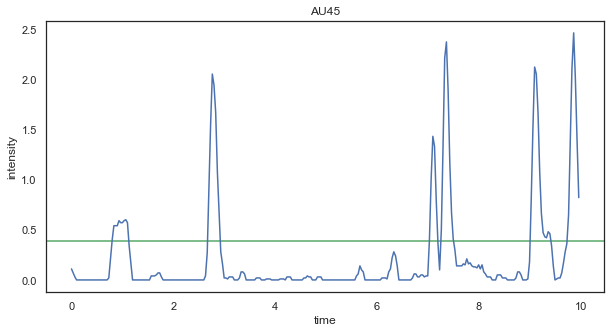

In [9]:
# full_data 

########################################################
file = '3100781052.avi'
file_name = file[:-4]+str('.csv')
########################################################


os.chdir("/media/ytikewk/76627FE2627FA591/dataset/DAiSEE/DAiSEE/csv_file/train")

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    os.chdir('../test')

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    os.chdir('../val')

if os.path.exists(file_name):
    full_data = pd.read_csv(file_name)
else:
    print("file nost exist")
    
    
os.getcwd()

timestamp = full_data.iloc[:,2:3]
gaze = full_data.iloc[:,5+6:5+8]
pose = full_data.iloc[:,293:299]
aus = full_data.iloc[:,-35:-18]


sns.set_style('white')
au = aus.iloc[:,-1]
au_mean = au[au != 0].mean()

plt.figure(figsize=(10,5))
# plt.subplot(211)
plt.axhline(au_mean,color="g")
plt.xlabel("time")
plt.ylabel('intensity')
plt.title('AU45')
plt.plot(timestamp,au)


In [5]:
# [(' AU45_c_mean', 35),
#  (' gaze_angle_x_std', 33),
#  (' pose_Tz_50%', 30),
#  (' pose_Tz_25%', 28),
#  (' pose_Tz_mean', 27),
#  (' pose_Rz_min', 26),
#  (' pose_Tx_max', 25),
#  (' gaze_angle_x_min', 24),
#  (' pose_Rx_min', 24),
#  (' pose_Tx_75%', 24)]

# [(' pose_Tz', 160),
#  (' pose_Tx', 137),
#  (' gaze_angle_x', 134),
#  (' pose_Rz', 132),
#  (' pose_Rx', 122),
#  (' gaze_angle_y', 112),
#  (' pose_Ry', 103),
#  (' pose_Ty', 83),
#  (' AU45_c', 62),
#  (' AU14_c', 40)]



In [4]:
timestamp = full_data.iloc[:,2:3]
gaze = full_data.iloc[:,5+6:5+8]
pose = full_data.iloc[:,293:299]
aus = full_data.iloc[:,-35:-18]

NameError: name 'full_data' is not defined

## AUS

In [3]:
sns.set_style('white')
au = aus.iloc[:,-1]
au_mean = au[au != 0].mean()

plt.figure(figsize=(10,5))
# plt.subplot(211)
plt.ylim(ymax=2)
plt.axhline(au_mean,color="g")

plt.xlabel("time")
plt.ylabel('intensity')
plt.title('AU45')

plt.plot(timestamp,au)

NameError: name 'aus' is not defined

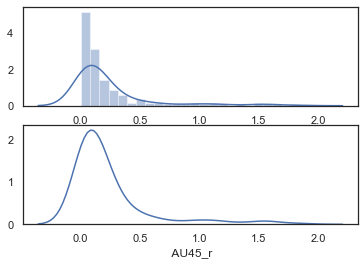

In [8]:
plt.figure(2)
plt.subplot(211)
g0 = sns.distplot(au[au!=0]);

plt.subplot(212)
sns.distplot(au[au!=0],hist = False);

## Gaze

In [9]:
pose.index = np.array(timestamp).reshape(-1)
pose_T = pose.iloc[:,:3]
pose_R = pose.iloc[:,-3:]

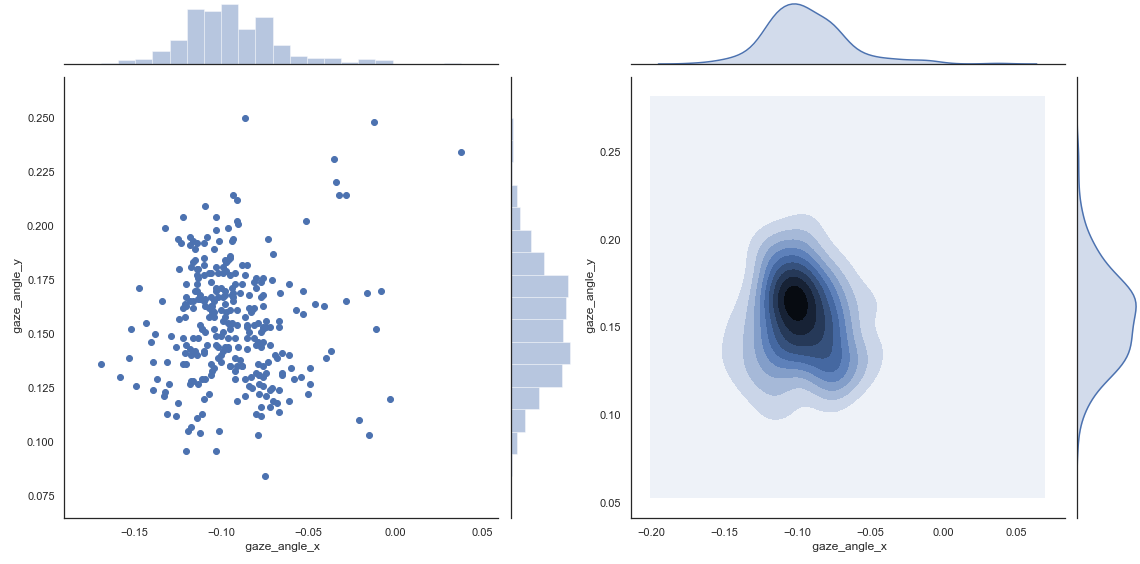

In [10]:

fig = plt.figure(figsize=(16,8))

# ax1 = fig.add_subplot(121);  
# ax2 = fig.add_subplot(122);

gs = gridspec.GridSpec(1, 2)

# plt.subplot(121)
g0 = sns.jointplot(x=" gaze_angle_x", y=" gaze_angle_y", data=gaze,kind="scatter");

# plt.subplot(122)
g1 = sns.jointplot(x=" gaze_angle_x", y=" gaze_angle_y", data=gaze,kind="kde");

mg0 = sfg.SeabornFig2Grid(g0, fig, gs[0])
mg1 = sfg.SeabornFig2Grid(g1, fig, gs[1])

gs.tight_layout(fig)
#gs.update(top=0.7)

plt.show()

## pose

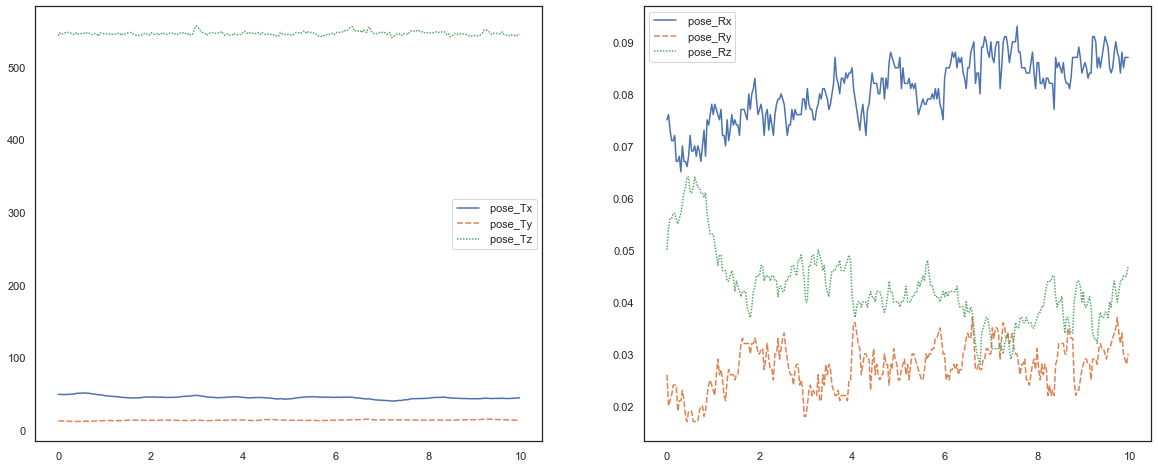

In [11]:
fig = plt.figure(figsize=(20,8))

# ax1 = fig.add_subplot(121);  
# ax2 = fig.add_subplot(122);

gs = gridspec.GridSpec(1, 2)

plt.subplot(121)
g0 = sns.lineplot(data=pose_T);

plt.subplot(122)
g1 = sns.lineplot(data=pose_R);

# mg0 = sfg.SeabornFig2Grid(g0, fig, gs[0])
# mg1 = sfg.SeabornFig2Grid(g1, fig, gs[1])

# gs.tight_layout(fig)
# #gs.update(top=0.7)

plt.show()